In [122]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Initialize an empty list to store DataFrames
data_frames = []

# Walk through the directory '/kaggle/input'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Construct the full path of the file
        file_path = os.path.join(dirname, filename)
        
        # Check if the file is a CSV file (you can modify this condition based on your file format)
        if file_path.endswith('.csv'):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Display the final DataFrame
print(data)


         arrival_time        start_time                    finish_time  \
0     30-03-2023 0.10   30-03-2023 0.10  2023-03-30 00:22:44.800000000   
1     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:53.200000000   
2     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:48.400000000   
3     30-03-2023 0.10   30-03-2023 0.14  2023-03-30 00:27:23.200000000   
4     30-03-2023 0.10   30-03-2023 0.15  2023-03-30 00:31:21.400000000   
..                ...               ...                            ...   
555  30-03-2023 22.00  30-03-2023 22.02  2023-03-30 22:16:59.800000000   
556  30-03-2023 22.00  30-03-2023 22.10  2023-03-30 22:13:56.200000000   
557  30-03-2023 22.00  30-03-2023 22.00  2023-03-30 22:05:35.799999999   
558  30-03-2023 23.54  30-03-2023 23.54  2023-03-31 00:00:42.400000000   
559  30-03-2023 23.54  30-03-2023 23.58  2023-03-31 00:17:23.200000000   

     wait_time  queue_length  
0        12.68            28  
1         9.82            28  
2         9.74    

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [124]:
import pandas as pd

# Assuming data is your DataFrame
# Display the column names to verify their correctness
print("Column Names:", data.columns)
data.drop(data[data["wait_time"] < 0].index, inplace = True)


Column Names: Index(['arrival_time', 'start_time', 'finish_time', 'wait_time',
       'queue_length'],
      dtype='object')


In [125]:
# Convert 'wait_time' to numeric, coercing errors to NaN
data['wait_time'] = pd.to_numeric(data['wait_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
data = data.dropna(subset=['wait_time'])

* **Time Series Analysis:**
1. *Plot the queue length over time to identify patterns or trends.*
1. *Analyze the waiting time variation throughout the day.*

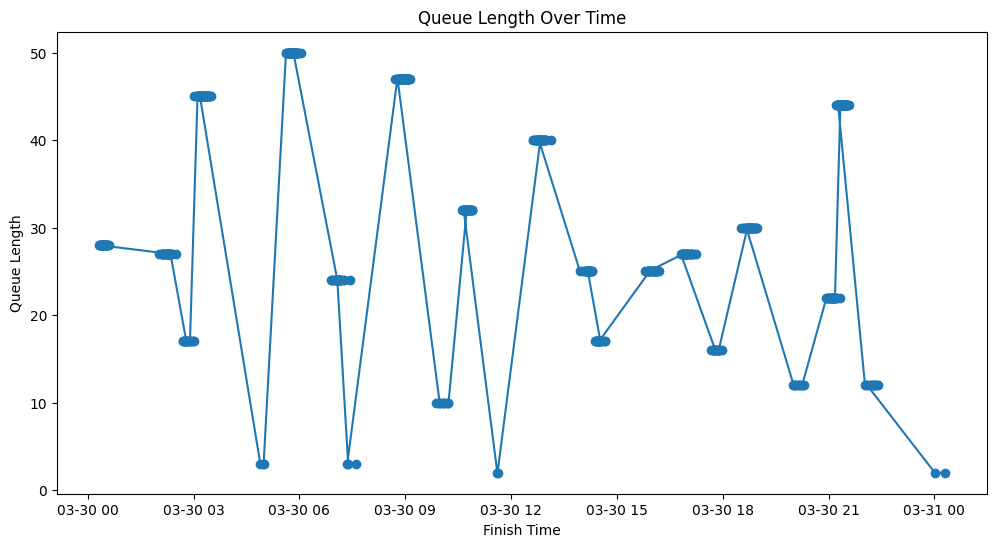

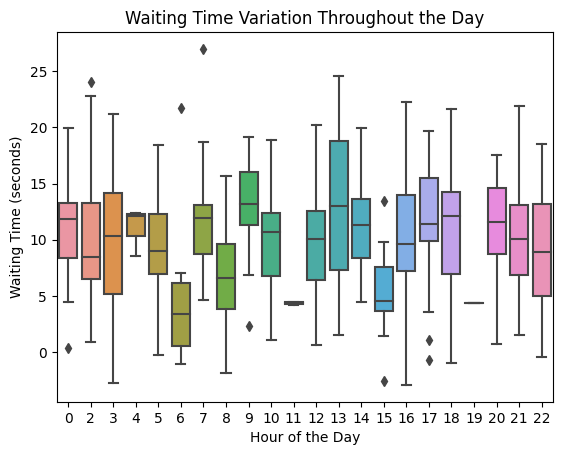

In [126]:
# Convert 'finish_time' to datetime
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Plot queue length over time
plt.figure(figsize=(12, 6))
plt.plot(df['finish_time'], df['queue_length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Finish Time')
plt.ylabel('Queue Length')
plt.show()

# Analyze waiting time variation throughout the day
df['hour'] = df['finish_time'].dt.hour
sns.boxplot(x='hour', y='wait_time', data=df)
plt.title('Waiting Time Variation Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Waiting Time (seconds)')
plt.show()

* **Statistical Summary:**

1. *Generate descriptive statistics for numeric columns.*

In [127]:
# Descriptive statistics
statistics = data.describe()
print(statistics)

        wait_time  queue_length
count  547.000000    547.000000
mean    10.377806     32.126143
std      4.771044     12.414417
min      0.340000      2.000000
25%      6.845000     25.000000
50%     10.360000     30.000000
75%     13.420000     44.500000
max     26.980000     50.000000


* **Waiting Time Distribution by Queue Length:**

1. *Visualize the distribution of waiting time for different queue lengths.*

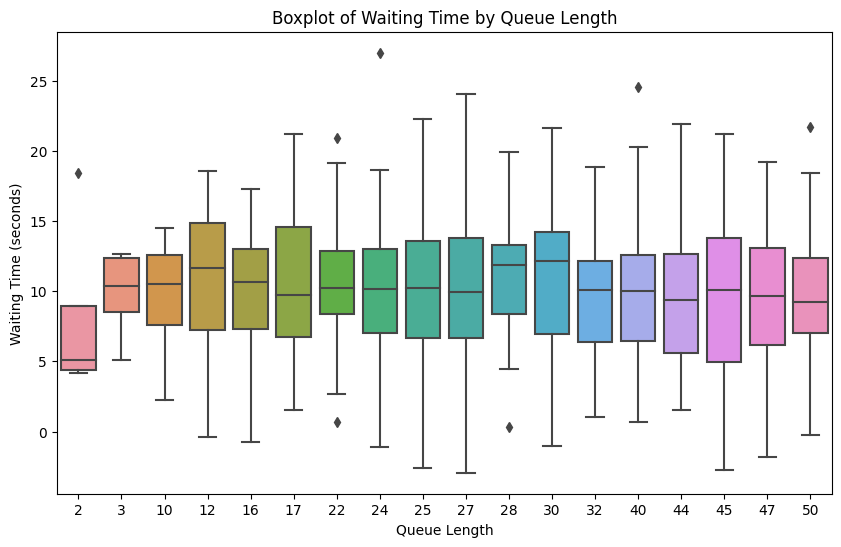

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['queue_length'], y=df['wait_time'])
plt.title('Boxplot of Waiting Time by Queue Length')
plt.xlabel('Queue Length')
plt.ylabel('Waiting Time (seconds)')
plt.show()

* **Correlation Analysis:**

1. *Explore correlations between different numeric columns.*

arrival_time            object
start_time              object
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
hour                     int32
dtype: object


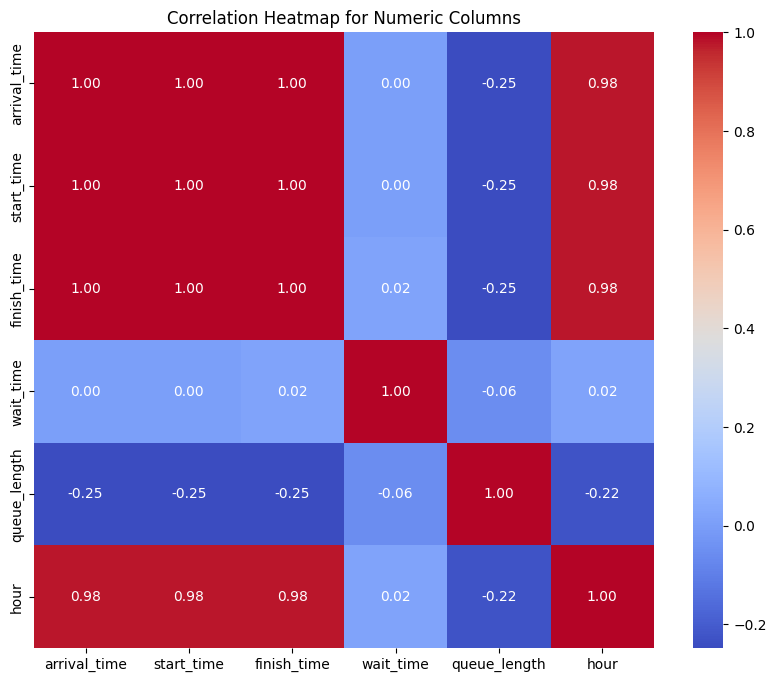

In [129]:
# Check the data types of each column
print(df.dtypes)

# Convert non-numeric columns to numeric, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Specify the format for 'arrival_time' and 'start_time'
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M')

# Correlation matrix for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

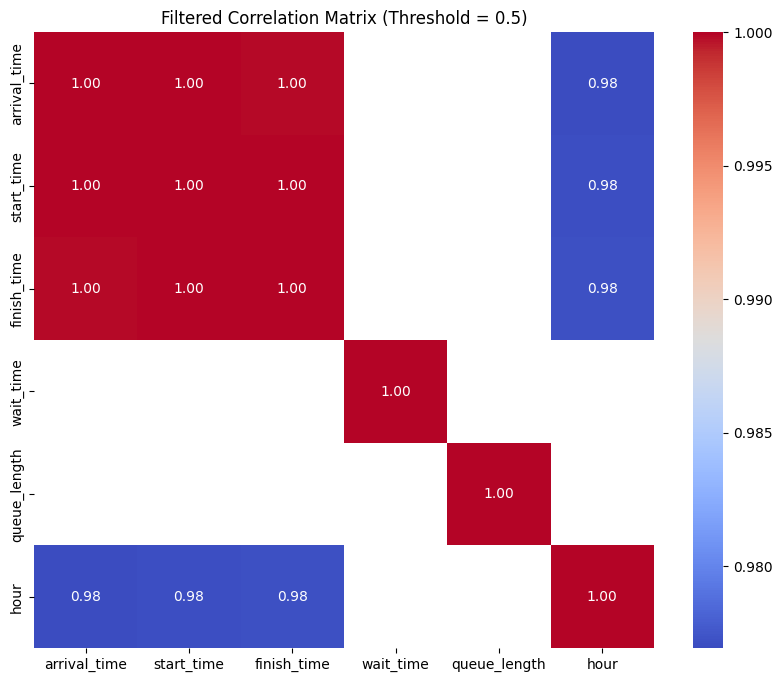

In [130]:
# Specify the correlation threshold
correlation_threshold = 0.5  # You can adjust this value based on your preference

# Filter the correlation matrix
filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# Plot the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Filtered Correlation Matrix (Threshold = {correlation_threshold})")
plt.show()

Highly Correlated Variable Pairs:
              arrival_time  start_time  finish_time  wait_time  queue_length  \
arrival_time         False        True         True      False         False   
start_time            True       False         True      False         False   
finish_time           True        True        False      False         False   
wait_time            False       False        False      False         False   
queue_length         False       False        False      False         False   
hour                  True        True         True      False         False   

               hour  
arrival_time   True  
start_time     True  
finish_time    True  
wait_time     False  
queue_length  False  
hour          False  


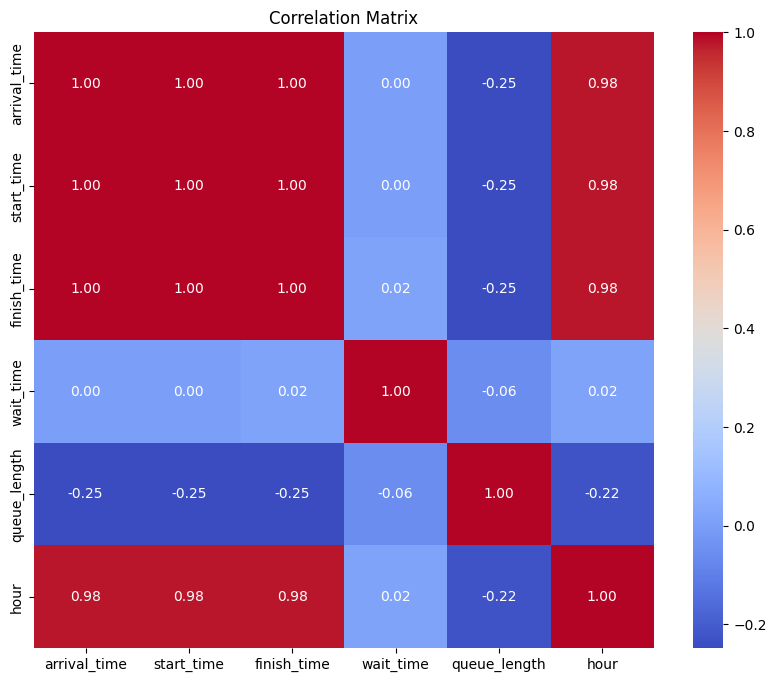

In [131]:
# Specify a high correlation threshold
high_correlation_threshold = 0.9  # You can adjust this value based on your preference

# Find highly correlated pairs
highly_correlated_pairs = (abs(correlation_matrix) > high_correlation_threshold) & (correlation_matrix < 1.0)

# Display highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(highly_correlated_pairs)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

        wait_time  queue_length
count  547.000000    547.000000
mean    10.377806     32.126143
std      4.771044     12.414417
min      0.340000      2.000000
25%      6.845000     25.000000
50%     10.360000     30.000000
75%     13.420000     44.500000
max     26.980000     50.000000


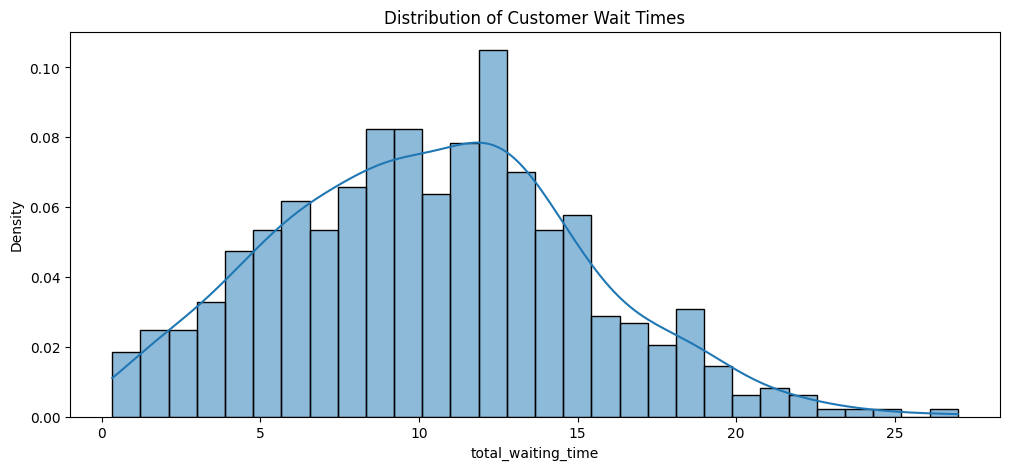

In [132]:
print(data.describe())

plt.figure(figsize=(12, 5))
total_waiting_time = data["wait_time"]
sns.histplot(total_waiting_time, kde=True, bins=30, stat="density")
plt.xlabel("total_waiting_time")
plt.ylabel("Density")
plt.title("Distribution of Customer Wait Times")
plt.show()

Exponential MLE

In [133]:
wait_time = data["wait_time"].values
lambda_hat = 1/np.mean(wait_time)
print(f"MLE Estimate for λ: {lambda_hat:.4f}")

MLE Estimate for λ: 0.0964


MLE Estimates:
Exponential λ: 0.0966
Gamma k: 4.8403, θ: 2.1396


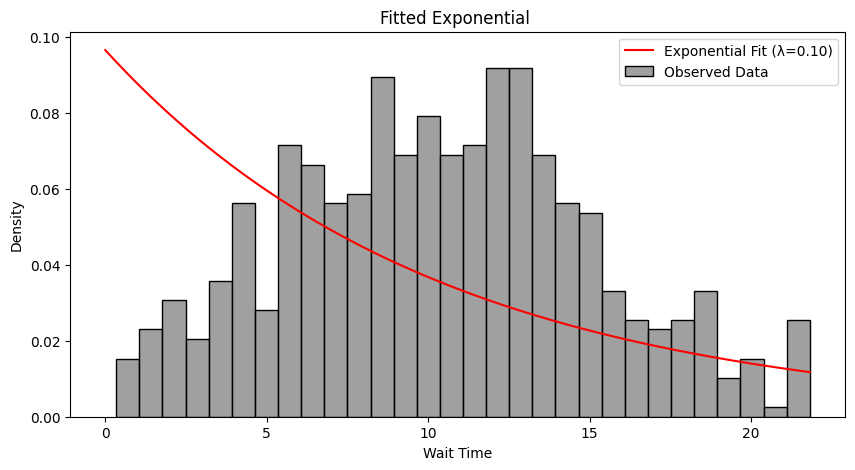

In [134]:
from scipy.stats import expon, gamma

# MLE for Exponential
lambda_hat = 1 / np.mean(wait_times)

print(f"MLE Estimates:\nExponential λ: {lambda_hat:.4f}\nGamma k: {k_hat:.4f}, θ: {theta_hat:.4f}")

# Plot the fitted PDFs
x = np.linspace(0, max(wait_times), 1000)

plt.figure(figsize=(10, 5))
sns.histplot(wait_times, bins=30, kde=False, color="gray", stat="density", label="Observed Data")

# Overlay fitted Exponential
plt.plot(x, expon.pdf(x, scale=1/lambda_hat), label=f"Exponential Fit (λ={lambda_hat:.2f})", color="red")

plt.legend()
plt.title("Fitted Exponential ")
plt.xlabel("Wait Time")
plt.ylabel("Density")
plt.show()


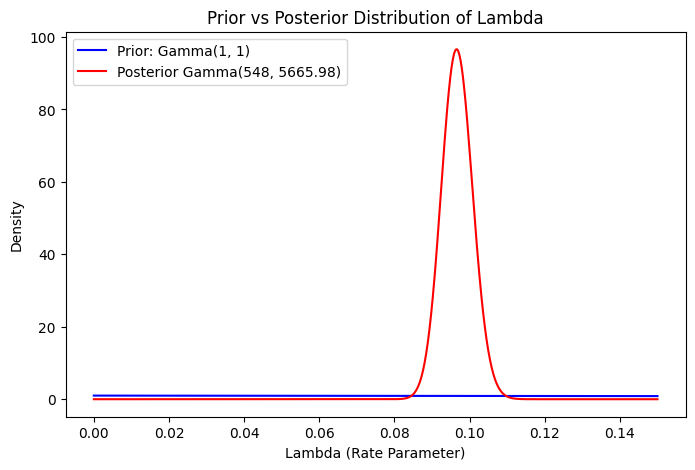

Posterior Mean Estimate of Lambda: 0.0967


In [135]:
n = len(wait_times)
sum_x = np.sum(wait_times)

# Prior parameters for Gamma
alpha_prior = 1
beta_prior = 1

# Posterior parameters
alpha_post = alpha_prior + n
beta_post = beta_prior + sum_x

# Posterior distribution
lambda_values = np.linspace(0, 0.15, 1000)
prior_pdf = stats.gamma.pdf(lambda_values, alpha_prior, scale=1/beta_prior)
posterior_pdf = scipy.stats.gamma.pdf(lambda_values, alpha_post, scale=1/beta_post)

plt.figure(figsize=(8, 5))
plt.plot(lambda_values, prior_pdf, label=f"Prior: Gamma({alpha_prior}, {beta_prior})", color='blue')
plt.plot(lambda_values, posterior_pdf, label=f"Posterior Gamma({alpha_post}, {beta_post})", color='red')
plt.xlabel("Lambda (Rate Parameter)")
plt.ylabel("Density")
plt.title("Prior vs Posterior Distribution of Lambda")
plt.legend()
plt.show()


# Bayesian Estimate of Lambda (Posterior Mean)
lambda_posterior_mean = alpha_post / beta_post
print(f"Posterior Mean Estimate of Lambda: {lambda_posterior_mean:.4f}")

Gamma MLE

In [136]:
import scipy.special as sp

mean_log_x = np.mean(np.log(wait_times))
sample_mean = np.mean(wait_times)
sample_var = np.var(wait_times, ddof=0)

shape_hat = (sample_mean ** 2) / sample_var
k_old = shape_hat

tol = 1e-6
for _ in range(10):
    k_new = k_old - (np.log(k_old) - sp.digamma(k_old) - np.log(sample_mean) + mean_log_x)/(1/k_old - sp.polygamma(1,k_old))
    if abs(k_new - k_old) < tol:
        break
    k_old = k_new
    
shape_hat = k_new
scale_hat = sample_mean / shape_hat

print(f"Refined MLE Estimates - k: {shape_hat:.4f}, θ: {scale_hat:.4f}")

Refined MLE Estimates - k: 3.5564, θ: 2.9121


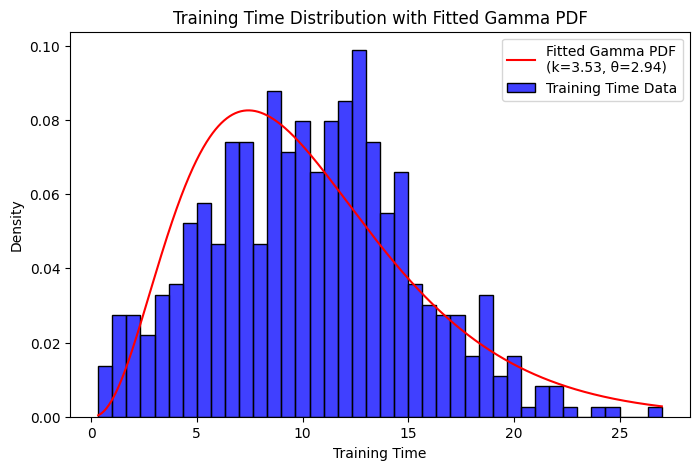

In [137]:
import scipy.stats
wait_times = data["wait_time"].values
# Estimate Gamma parameters using MLE
shape_hat, loc, scale_hat = scipy.stats.gamma.fit(wait_times, floc=0)

# Create x-axis range for plotting the fitted distribution
x = np.linspace(min(wait_times), max(wait_times), 1000)

# Compute the fitted Gamma PDF
gamma_pdf = scipy.stats.gamma.pdf(x, a=shape_hat, scale=scale_hat)

# Plot Histogram and Fitted Distribution
plt.figure(figsize=(8, 5))
sns.histplot(wait_times, kde=False, bins=40, stat="density", color="blue", label="Training Time Data")
plt.plot(x, gamma_pdf, "r-", label=f"Fitted Gamma PDF\n(k={shape_hat:.2f}, θ={scale_hat:.2f})")

# Labels and Legend
plt.xlabel("Training Time")
plt.ylabel("Density")
plt.title("Training Time Distribution with Fitted Gamma PDF")
plt.legend()
plt.show()


Posterior r': 1133.765002638524
Posterior k': 0.007338529992077745
Sum of x^delta: 135.76707270795956


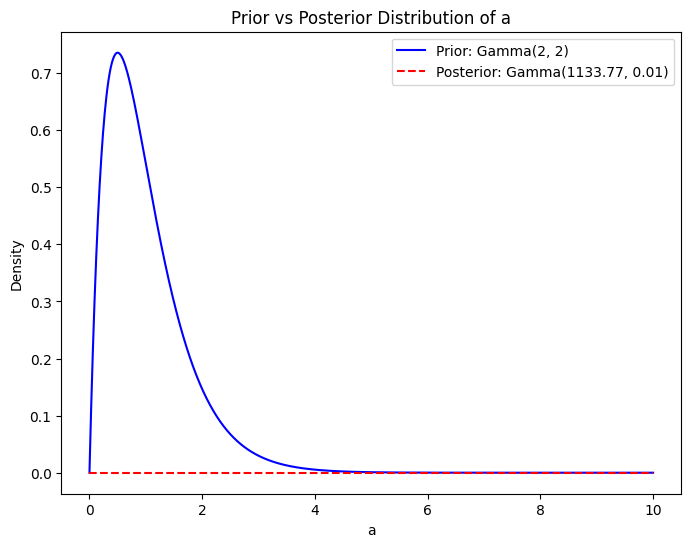

In [138]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data
wait_times = data["wait_time"].values

# Sample statistics
sample_mean = np.mean(wait_times)
sample_var = np.var(wait_times)
thetha_0 = sample_var / sample_mean  # Initial scale parameter
k_0 = shape_hat  # Initial shape parameter

# Given shape parameters
gamma = k_0
delta = thetha_0

# Given prior hyperparameters for a ~ Gamma(r, k)
r_prior = 2
k_prior = 2  

# Fix large values

#scaled_wait_times = wait_times / np.max(wait_times)  # Normalize

# Compute posterior hyperparameters
n = len(wait_times)
sum_x_delta = np.sum(scaled_wait_times ** delta)  # Avoid overflow

r_post = (n * (gamma + 1)) / delta + r_prior
k_post = k_prior / (1 + k_prior * sum_x_delta)

print(f"Posterior r': {r_post}")
print(f"Posterior k': {k_post}")
print(f"Sum of x^delta: {sum_x_delta}")

# Define range of 'a' values
a_values = np.linspace(0, 10, 1000)

# Prior and Posterior distributions
prior_pdf = stats.gamma.pdf(a_values, a=r_prior, scale=1/k_prior)
posterior_pdf = stats.gamma.pdf(a_values, a=r_post, scale=1/k_post)  # Fixed scale parameter

# Plot
plt.figure(figsize=(8,6))
plt.plot(a_values, prior_pdf, 'b-', label=f'Prior: Gamma({r_prior}, {k_prior})')
plt.plot(a_values, posterior_pdf, 'r--', label=f'Posterior: Gamma({r_post:.2f}, {k_post:.2f})')
plt.xlabel("a")
plt.ylabel("Density")
plt.title("Prior vs Posterior Distribution of a")
plt.legend()
plt.show()




Null Hypothesis: Data follows Exponential distribution(k=1)
Alternative Hypothesis: Data follows Gamma distribution(k != 1)

In [139]:
from scipy.stats import expon, gamma

# Compute log-likelihood for Exponential
logL_exp = np.sum(expon.logpdf(wait_times, scale=1/lambda_hat))

# Compute log-likelihood for Gamma
logL_gamma = np.sum(gamma.logpdf(wait_times, k_hat, scale=theta_hat))

# Likelihood Ratio Test
LR_stat = -2 * (logL_exp - logL_gamma)
p_value = 1 - stats.chi2.cdf(LR_stat, df=1)

print(f"LRT Statistic: {LR_stat:.4f}, p-value: {p_value:.10f}")

threshold = 0.05
if p_value < threshold:
    print("Rejecting Null Hypothesis. Gamma distribution is a better fit than exponential distribution")
else:
    print("Accepting Null Hypothesis")

# Compute Bayesian Information Criterion (BIC)
n = len(wait_times)
BIC_exp = -2 * logL_exp + np.log(n) * 1  
BIC_gamma = -2 * logL_gamma + np.log(n) * 2  

print(f"BIC Exponential: {BIC_exp:.2f}, BIC Gamma: {BIC_gamma:.2f}")

# Compare BIC: Lower is better
if BIC_exp < BIC_gamma:
    print("Exponential model is preferred based on BIC.")
else:
    print("Gamma model is preferred based on BIC.")


LRT Statistic: 309.5020, p-value: 0.0000000000
Rejecting Null Hypothesis. Gamma distribution is a better fit than exponential distribution
BIC Exponential: 3659.91, BIC Gamma: 3356.71
Gamma model is preferred based on BIC.
